In [6]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib as plt
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


In [2]:
# pip install tensorflow

In [7]:
count = 0 
dirs = os.listdir('./images')
for dir in dirs:
    files = list(os.listdir('./images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

city Folder has 300 Images
nature Folder has 294 Images
Images Folder has 594 Images


In [8]:
base_dir = './images'
val_dir = './Sample/'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 594 files belonging to 2 classes.
Using 476 files for training.


Found 594 files belonging to 2 classes.
Using 118 files for validation.


In [6]:
city_names = train_ds.class_names
city_names

['city', 'nature']

In [7]:
import matplotlib.pyplot as plt

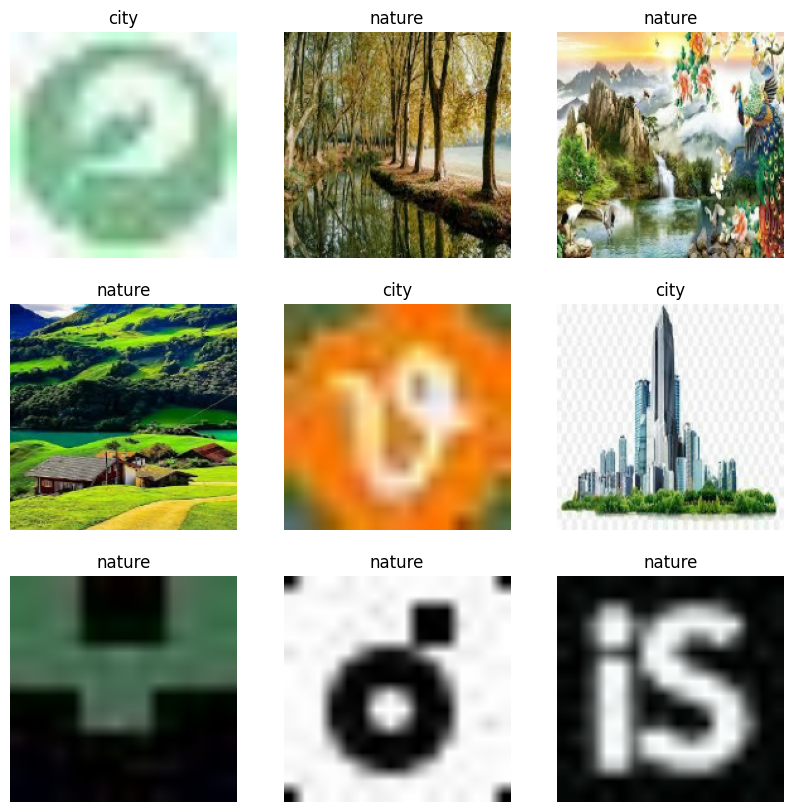

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(city_names[labels[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\Legion\anaconda3\envs\dl-workshop-B\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


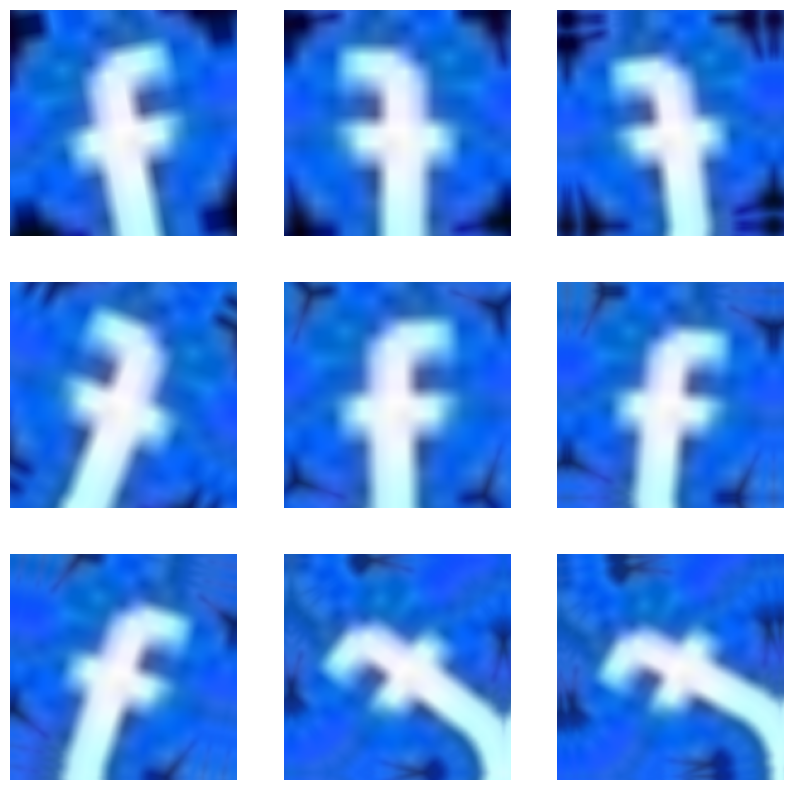

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [14]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.5230 - loss: 1.0189 - val_accuracy: 0.7288 - val_loss: 0.5739
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.6825 - loss: 0.5866 - val_accuracy: 0.6780 - val_loss: 0.5847
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7417 - loss: 0.5250 - val_accuracy: 0.7542 - val_loss: 0.5283
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.7610 - loss: 0.4882 - val_accuracy: 0.7203 - val_loss: 0.5339
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.7416 - loss: 0.4695 - val_accuracy: 0.7881 - val_loss: 0.4994
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.7413 - loss: 0.5035 - val_accuracy: 0.7119 - val_loss: 0.5801
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.7664 - loss: 0.4864 - val_accuracy: 0.7542 - val_loss: 0.5102
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.8057 - loss: 0.4238 - val_accuracy: 0.

In [18]:
model.save('city_classification.keras')


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
furniture_names=['city','nature']
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + furniture_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

model = tf.keras.models.load_model('city_classification.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

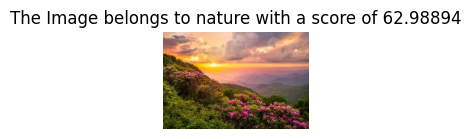

In [4]:
imgPath = './nature.jpeg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')